## 머신러닝으로 데이터 분석하기 : Decision Tree(의사결정 나무)
---
### 사용 패키지 준비

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 데이터 불러오기

In [35]:
data = pd.read_csv("C:/Data/data.csv")
data = data.apply(pd.to_numeric, errors = 'coerce').fillna(0)
data

,풍향,풍속,시정,전운량,최저운고,기온,강수량,현황
0,3,4,1000,4,25,1.4,0,0
1,33,5,1000,7,25,2.5,0,0
2,31,6,1000,2,25,3.7,0,0
3,32,6,1000,3,25,3.8,0,0
4,30,8,1000,7,25,4.2,0,0
...,...,...,...,...,...,...,...,...
144675,27,7,1000,0,180,15.3,0,0
144676,14,2,800,0,40,13.0,0,0
144677,36,10,600,7,15,1.3,0,0
144678,33,11,120,7,15,0.6,0,0


### 학습 데이터, 타겟 데이터 지정하기
* 학습 데이터는 pandas의 DataFrame 타입으로 불러왔기 때문에 numpy 객체로 변환
* 학습 데이터의 컬럼 : 풍향, 풍속, 시정, 전운량, 최저운고, 기온, 강수량
* 타겟 데이터(예측할 데이터) : 현황

In [36]:
# 학습 데이터 
train_data = data[['풍향', '풍속', '시정', '전운량','최저운고', '기온', '강수량']].to_numpy()
# 타겟 데이터 
target = data['현황'].to_numpy()

### 테스트 셋 분리하기
* train_test_split 사용 : 학습 데이터 셋, 테스트 데이터 셋 분리
* test_size : 30%

In [37]:
train_input, test_input, train_target, test_target = train_test_split(train_data, target, test_size = 0.3)
print(train_input.shape, test_input.shape)

(101276, 7) (43404, 7)


### 데이터 스케일링
* 모든 속성의 데이터 분포, 범위를 동일하게 조정

In [38]:
# 스케일링 
ss = StandardScaler()

# 학습 데이터 
ss.fit(train_input)

# 데이터 스케일링(스케일 조정)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 모델 학습시키기

In [39]:
model = DecisionTreeClassifier()
model.fit(train_scaled, train_target)

DecisionTreeClassifier()

### 의사결정나무 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

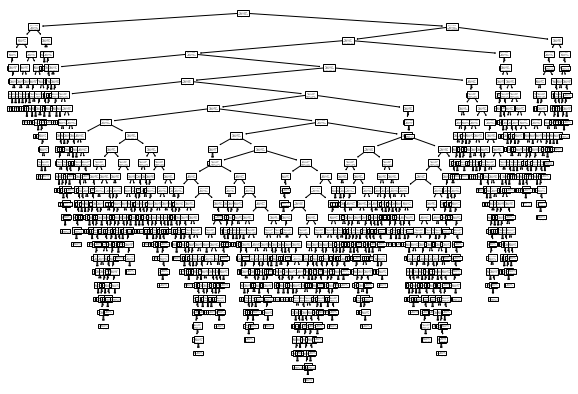

In [40]:
plt.figure(figsize=(10,7))
plot_tree(model)
plt.show

### 모델 성능평가
---
#### 정확도

In [41]:
print(f"학습 세트 정확도 : {model.score(train_scaled, train_target)}")
print(f"테스트 세트 정확도: {model.score(test_scaled, test_target)}")

학습 세트 정확도 : 0.9972550258699001
테스트 세트 정확도: 0.9962215464012534


#### 학습된 모델로 예측

In [42]:
y_pred = model.predict(test_scaled)

#### 성능평가를 위해 혼동행렬 확인

In [43]:
print(confusion_matrix(test_target, y_pred))

[[43019    38]
 [  126   221]]


#### 혼동행렬 시각화

C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\yeji4\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44050 missing from curre

([<matplotlib.axis.XTick at 0x27a19699e20>,
 [Text(0.5, 0, 'True'), Text(1.5, 0, 'False')])

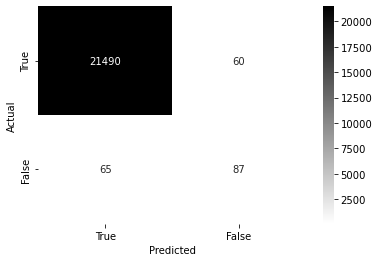

In [44]:
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

d = {'예측값(P)' : [21490, 65],
     '예측값(N)' : [60, 87]}
d = DataFrame(d)

sns.heatmap(d, annot = True, fmt = 'd', cmap = 'gist_yarg')
plt.ylabel("Actual")
plt.yticks([0.5, 1.5], ['True', 'False'])
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['True', 'False'])

#### 성능평가를 위한 4가지 조건
* 정확도 : True를 True로 옳게 예측한 경우 + False를 False로 옳게 예측한 경우
* 정밀도 : True라고 분류한 것 중에서 실제 True인 경우
* 재현율 : 실제 True인 것 중에서 모델이 True라고 분류한 경우
* F1 score : 정밀도와 재현율의 조화평균 

In [45]:
print("정확도 : {: .2f}".format(accuracy_score(test_target, y_pred) * 100))
print("정밀도 : {: .2f}".format(precision_score(test_target, y_pred) * 100))
print("재현율 : {: .2f}".format(recall_score(test_target, y_pred) * 100))
print("F1-score : {: .2f}".format(f1_score(test_target, y_pred) * 100))

정확도 :  99.62
정밀도 :  85.33
재현율 :  63.69
F1-score :  72.94
